# Homework 7 - Enis Becirbegovic

***Breadth-first vs Dijkstra search***  

In this exercise, we will explore Dijkstra's Algorithm in terms of hash maps and computational
complexity. The base code is described in Chapter 7 of Grokking Algorithms (Bhargava 2016)

In [128]:
import random
import string
from collections import deque
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import networkx as nx

# 1.
First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the
time that it will take to get to L.A. from NYC using the breadth first algorithm. (Even though BFS
does not use weighted edges, we will indirectly use them to calculate the time of the route).

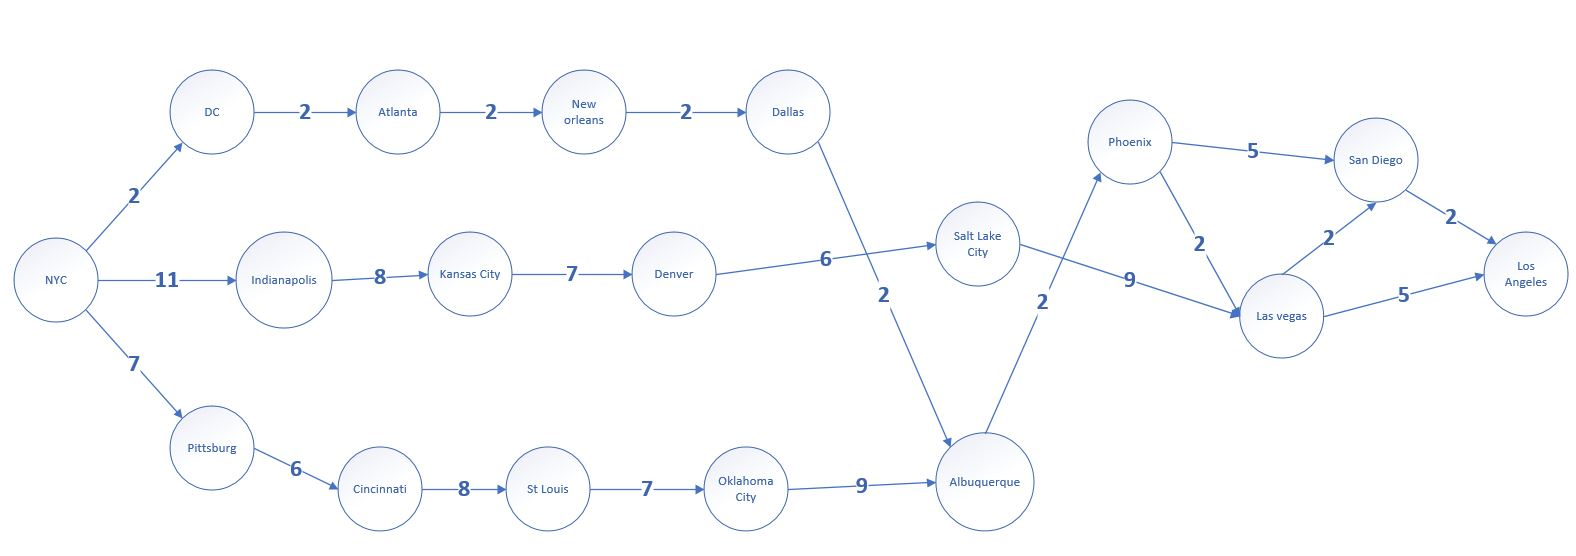

In [27]:
G = nx.Graph()
G.add_nodes_from(['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas','Albuquerque','Phoenix',\
                  'Las Vegas','San Diego','Los Angeles','Indianapolis','Kansas City', 'Denver',\
                  'Salt Lake City', 'Pittsburg','Cincinnati', 'St Louis', 'Oklahoma City'])

In [30]:
G.add_edge('NYC','DC',weight=2)
G.add_edge('NYC','Indianapolis',weight=11)
G.add_edge('NYC','Pittsburg',weight=7)
G.add_edge('DC','Atlanta',weight=2)
G.add_edge('Atlanta','New Orleans',weight=2)
G.add_edge('New Orleans','Dallas',weight=2)
G.add_edge('Dallas','Albuquerque',weight=2)
G.add_edge('Albuquerque','Phoenix',weight=2)
G.add_edge('Phoenix','Las Vegas',weight=2)
G.add_edge('Phoenix','San Diego',weight=5)
G.add_edge('Las Vegas','San Diego',weight=2)
G.add_edge('Las Vegas','Los Angeles',weight=5)
G.add_edge('San Diego','Los Angeles',weight=2)
G.add_edge('Indianapolis','Kansas City',weight=8)
G.add_edge('Kansas City','Denver',weight=7)
G.add_edge('Denver','Salt Lake City',weight=6)
G.add_edge('Salt Lake City','Las Vegas',weight=9)
G.add_edge('Pittsburg','Cincinnati',weight=6)
G.add_edge('Cincinnati','St Louis',weight=8)
G.add_edge('St Louis','Oklahoma City',weight=7)
G.add_edge('Oklahoma City','Albuquerque',weight=9)

In [133]:
def path_estimation(path_):
    pairs = [path_[i: i + 2] for i in range(len(path_)-1)] 
    combined_single_paths = []
    for pair in pairs:
        combined_single_paths.append([pair[0],pair[1],G[pair[0]][pair[1]]['weight']])

    print("Path:")
    print("-"*5)
    print(' --> '.join(path_))
    print("Total Nodes Visited:" , len(path_)-1)

    print('\n')
    print("Detailed:")
    print("-"*10)
    total_distance = 0
    for path in combined_single_paths:

        print(' --> '.join(path[0:2]) + "; Distance " + str(path[2:][0]))
        total_distance +=path[2:][0]

        
    print('\n')
    print("Total Distance: ", total_distance)

In [134]:
source = 'NYC'
dest = 'Los Angeles'

# 1.
First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).

In [135]:
bf_path = nx.shortest_path(G, source, dest)

### Discussion: 
 
We use default method from networkx search to find the  shortest_path. WIth the path at hand we can estimate the distance. I've used custom made path_estimation function for this purpose.

# 2.

Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [136]:
print("Breadth-first (Shortest Path): \n ")
path_estimation(bf_path)

Breadth-first (Shortest Path): 
 
Path:
-----
NYC --> Indianapolis --> Kansas City --> Denver --> Salt Lake City --> Las Vegas --> Los Angeles
Total Nodes Visited: 6


Detailed:
----------
NYC --> Indianapolis; Distance 11
Indianapolis --> Kansas City; Distance 8
Kansas City --> Denver; Distance 7
Denver --> Salt Lake City; Distance 6
Salt Lake City --> Las Vegas; Distance 9
Las Vegas --> Los Angeles; Distance 5


Total Distance:  46


### Discussion:

Breadth-first visits 6 nodes (excluding the starting node) with the total distance of 46.

# 3.

Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).

In [138]:
dijkstra_path = nx.dijkstra_path(G, source, dest)

### Discussion: 
 
We use default method from networkx search to find the  dijkstra_path. With the path at hand we can estimate the distance. I've used custom made path_estimation function for this purpose.

# 4.

Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [139]:
print("Breath First (Shortest Path): \n ")
path_estimation(dijkstra_path)

Breath First (Shortest Path): 
 
Path:
-----
NYC --> DC --> Atlanta --> New Orleans --> Dallas --> Albuquerque --> Phoenix --> Las Vegas --> San Diego --> Los Angeles
Total Nodes Visited: 9


Detailed:
----------
NYC --> DC; Distance 2
DC --> Atlanta; Distance 2
Atlanta --> New Orleans; Distance 2
New Orleans --> Dallas; Distance 2
Dallas --> Albuquerque; Distance 2
Albuquerque --> Phoenix; Distance 2
Phoenix --> Las Vegas; Distance 2
Las Vegas --> San Diego; Distance 2
San Diego --> Los Angeles; Distance 2


Total Distance:  18


### Discussion:

Dijkstra visits 9 nodes (excluding the starting node) with the total distance of 18.

# 5. 

Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.

### Discussion:

Shortest Path:
* **Time from NYC to LA = 46**
* **Visited Notes = 6**
    
Dijkstra: 
* **Time from NYC to LA = 18**
* **Visited Notes = 9** 
    
The results are as expected. The Shortest Path calculates the path by using the least amount of nodes necessary to get to the final destination. Dijkstra, on the other hand, uses the weights and determines the shortest distance based on the weighted graph. 

# 6.
Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm
performance

In [152]:
distance = [46,18]
nodes = [6,9]
names = ['Breadth-First','Dijkstra']
results  = pd.DataFrame([names,distance, nodes]).T
results.columns = ['names','distance','Num_Nodes']
results.set_index('names',inplace=True)
results = pd.DataFrame(results.to_records())
results[['distance','Num_Nodes']] = results[['distance','Num_Nodes']].astype(float)
results 

,names,distance,Num_Nodes
0,Breadth-First,46.0,6.0
1,Dijkstra,18.0,9.0


In [161]:
"-->".join(bf_path)

'NYC-->Indianapolis-->Kansas City-->Denver-->Salt Lake City-->Las Vegas-->Los Angeles'

Breadth-First path
 NYC-->Indianapolis-->Kansas City-->Denver-->Salt Lake City-->Las Vegas-->Los Angeles
Dijkstra path
 NYC-->DC-->Atlanta-->New Orleans-->Dallas-->Albuquerque-->Phoenix-->Las Vegas-->San Diego-->Los Angeles


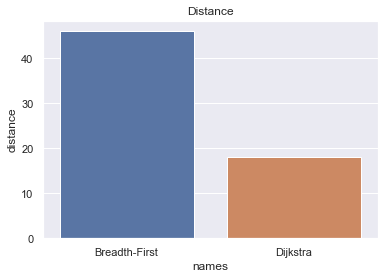

In [166]:
print("Breadth-First path\n","-->".join(bf_path))
print("Dijkstra path\n","-->".join(dijkstra_path))

sns.barplot(data=results, x='names', y='distance')
plt.title("Distance");

Breadth-First path
 NYC-->Indianapolis-->Kansas City-->Denver-->Salt Lake City-->Las Vegas-->Los Angeles
Dijkstra path
 NYC-->DC-->Atlanta-->New Orleans-->Dallas-->Albuquerque-->Phoenix-->Las Vegas-->San Diego-->Los Angeles


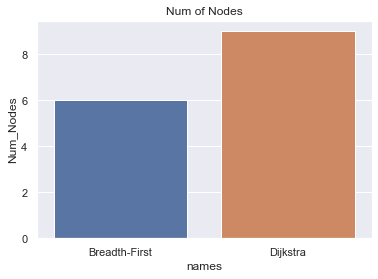

In [167]:
print("Breadth-First path\n","-->".join(bf_path))
print("Dijkstra path\n","-->".join(dijkstra_path))

sns.barplot(data=results, x='names', y='Num_Nodes')
plt.title("Num of Nodes");

### Discussion 5 and 6:

The graph above compares the results of the two algorithms and reaffirms what we have already observed. Breadth-first find the path based on the number of nodes while Dijkstra determines the path based on the shortest distance.   

# Executive Summary

In this exercise, we explored and compared the results of finding the shorted path in a graph like data structure using ***Breadth-first*** and ***Dijkstra*** algorithms. ***Breadth-first*** generally is agnostic to the number of vertices and their weight and its search the shorted path in terms of nodes. ***Dijkstra*** algorithm is agnostic to node numbers and takes into consideration the vertices' weights. The results are quite different and will discuss later. The exercises consisted of the following steps:

1. Create graph structure with vertices and the weights using networkx python packages
2. Find the shorted path from NYC to LA
3. Show the results
4. Find the Dijkstra path from NYC to LA
5. Show the results
6. Compare the results
7. Graphinclly show the algorithms time differences

The results show that ***Breadth-first***(shortest path) chooses the least amount of node to visit while searching the path solution from NYC to LA all while ignoring the node weights. The final solution shows that the shortest path visits 6 nodes. Implicitly we can estimate that distance using the path which equals to 46. 

On the other hand, the results show that ***Djinstra*** chooses the path that that sums up to the shortest distance from  NYC to LA, taking into consideration vertices and their weights.   The final solution shows that ***Djinstra*** visits 9 nodes while the estimated total distance with ***Djinstra*** is 18 (almost 3x shorter distance from breadth-first). The results graphically are shown below: 

 

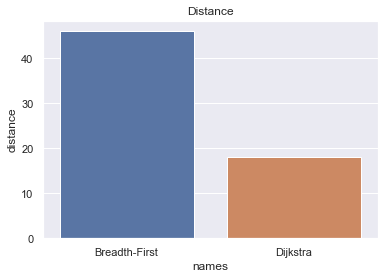

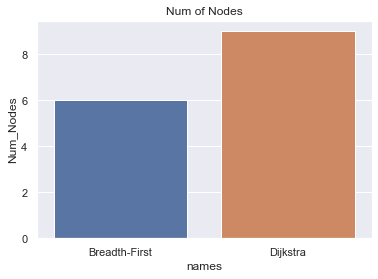


This exercise shows the difference between ***Breadth-first*** and ***Dijkstra***. While one algorithm is designed to search for the shorted numbers of nodes to visit, the other one searches for the shortest distance. This doesn't say one is better than the other but rather it shows different solutions to a different types of problems.
